In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from xgboost import XGBRegressor

from forecaster import Forecaster

In [2]:
train = pd.read_csv("train.csv", parse_dates=['Date']).sort_values(by = ["Date", "Province_State", "County"])
test = pd.read_csv("test.csv", parse_dates=['Date']).sort_values(by = ["Date", "Province_State", "County"])

df = pd.concat([train, test])
df.loc[(df['County'].isna()) & (~df['Province_State'].isna()), 'County'] = df.loc[(df['County'].isna()) & (~df['Province_State'].isna()), 'Province_State'] + '_County'
df.loc[(df['County'].isna()) & (df['Province_State'].isna()), 'County'] = df.loc[(df['County'].isna()) & (df['Province_State'].isna()), 'Country_Region'] + '_County'
df.loc[(df['Province_State'].isna()), 'Province_State'] = df.loc[(df['Province_State'].isna()), 'Country_Region'] + '_Province_State'

df['ForecastId'] = df['ForecastId'].fillna(df['Id']).astype(int)
df['Location'] = df['Province_State'] + '_' + df['County']
df = df.drop(columns = ['Id', 'County', 'Province_State'])

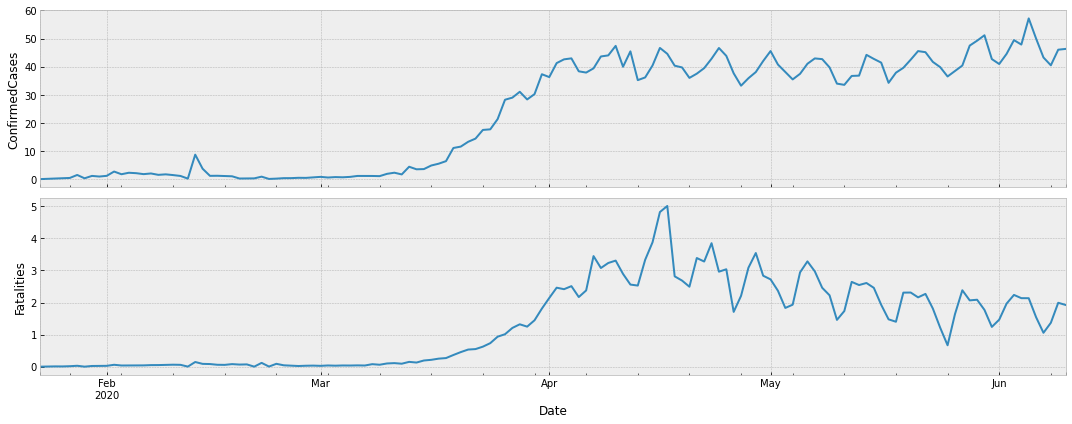

In [3]:
fig, axes = plt.subplots(2, 1, figsize = (15, 6), sharex = True)
for i, group in enumerate(df.groupby("Target")):
    group[1].groupby("Date")['TargetValue'].mean().plot(ax = axes[i])
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel(group[0])
plt.tight_layout()

In [4]:
dfs = {}
dfs['ConfirmedCases'] = df[df['Target'] == 'ConfirmedCases'].drop(columns = "Target")
dfs['Fatalities'] = df[df['Target'] == 'Fatalities'].drop(columns = "Target")

In [5]:
model_cc = Forecaster(
    dfs['ConfirmedCases'],
    x = 'Date',
    y = 'TargetValue',
    group_features = ['Country_Region', 'Location'],
    keep_id = 'ForecastId'
)

In [ ]:
pred, scores = model_cc.validate(XGBRegressor, plot = True, by = ['Country_Region', 'Location'])

  0%|          | 0/187 [00:00<?, ?it/s]